In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cd gdrive/My Drive/FYP

/content/gdrive/My Drive/FYP


# One dimensional color transfer. Reinhard's algorithm

In [ ]:
import numpy as np
number_of_images = 4

In [ ]:
def go_through_file_list():
    #initialize array
    source_image_list = []
    target_image_list = []
    for i in range(1,number_of_images):
        src_image_name = "source/s" + str(i) +".jpg"
        source_image_list.append(src_image_name)
        tgt_image_name = "target/t" + str(i)
        target_image_list.append(tgt_image_name)
    source_image_list = np.array(source_image_list)
    target_image_list = np.array(target_image_list)
    #return list of image names
    return source_image_list, target_image_list

In [ ]:
source_list, target_list = go_through_file_list()

In [ ]:
# Task 1 : Transfering color statistics from one image to another
# 
#   @Surabhi Malani
#
# References
# link 1 : https://github.com/chia56028/Color-Transfer-between-Images/blob/master/color_transfer.py
# link 2: https://www.cnblogs.com/likethanlove/p/6003677.html

import numpy as np
import cv2
import os

number_of_images = 4
# Go through the image file list
def go_through_file_list():
    #initialize array
    source_image_list = []
    target_image_list = []
    for i in range(1,number_of_images):
        src_image_name = "src_clip" + str(i)
        source_image_list.append(src_image_name)
        tgt_image_name = "target_clip" + str(i)
        target_image_list.append(tgt_image_name)
    source_image_list = np.array(source_image_list)
    target_image_list = np.array(target_image_list)
    #return list of image names
    return source_image_list, target_image_list

# Read image file and convert to grayscale
def read_image_file(source_image_name, target_image_name):
    # Need to convert the colors to grayscale in order to calculate pixel intensity
    # Ignore color space
    source_image = cv2.imread('source/'+source_image_name+'.jpg')
    source_image = cv2.cvtColor(source_image,cv2.COLOR_BGR2LAB) #convert to grayscale 
    target_image = cv2.imread('target/'+target_image_name+'.jpg')
    target_image = cv2.cvtColor(target_image,cv2.COLOR_BGR2LAB) #convert to grayscale
    
    return source_image, target_image

# Calculate mean and standard deviation specific to the channels (R, G, B)
def calculate_mean_std(img, channel):
    img_mean_list = []
    img_std_list = []
    for i in range(channel) :
        ghist = cv2.calcHist(img, [i], None, [256], [0,256]) # histogram
        # First Way
        img_mean = np.mean(img[:,:,i])
        img_mean_list.append(img_mean)
        img_std = np.std(img[:,:,i])
        img_std_list.append(img_std)
        # print("1st way: mean " + str(img_mean) + " std: " + str(img_std))
        #---
        # Second Way
        # x_mean, x_std = cv2.meanStdDev(img)
        # x_mean = np.hstack(np.around(x_mean,2))
        # x_std = np.hstack(np.around(x_std,2))
        # print("2nd way: mean " + str(x_mean) + " std: " + str(x_std))
    img_mean_list = np.array(img_mean_list)
    img_std_list = np.array(img_std_list)

    return img_mean_list, img_std_list


def color_transfer(source_image, target_image ,i):
    print("Reading image " + source_image)
    source_gray, target_gray = read_image_file(source_image,target_image)
    height, width, channel = source_gray.shape

    src_mean, src_sd = calculate_mean_std(source_gray, channel)
    tgt_mean, tgt_sd = calculate_mean_std(target_gray, channel)

    for row in range(height):
        for col in range(width):
            for k in range(0,channel):
                # Extract pixel information
                src_point = source_gray[row,col,k]
                # Subtract mean from data points on the source image
                src_point = src_point - src_mean[k]
                # Scale data points by respective standard deviation
                src_point = src_point * (tgt_sd[k]/src_sd[k])
                # Add average computed for target image
                src_point += tgt_mean[k]

                # necessary rounding
                src_point = np.round(src_point)
                # boundary check
                if src_point<0:
                    src_point = 0
                    
                if src_point>255:
                    src_point = 255
                source_gray[row,col,k] = src_point

    # Convert image back to color
    new_source = cv2.cvtColor(source_gray,cv2.COLOR_LAB2BGR)
    # Saving image
    print('saving image ' + str(i))
    cv2.imwrite('result_one_dimensional/'+'Result'+str(i)+'.jpg',new_source)
    print('completed saving image ' + str(i))

In [ ]:
color_transfer("s2", "t5",1)

Reading image s2
saving image 1
completed saving image 1


In [ ]:
color_transfer("s1", "t4",2)

Reading image s1
saving image 2
completed saving image 2


In [ ]:
color_transfer("s3", "t2",3)

Reading image s3
saving image 3
completed saving image 3


In [ ]:
color_transfer("s5", "t2",4)

Reading image s5
saving image 4
completed saving image 4


In [ ]:
color_transfer("s2", "t4",5)

Reading image s2
saving image 5
completed saving image 5


In [ ]:
color_transfer("s6", "t5",6)

Reading image s6
saving image 6
completed saving image 6


In [ ]:
color_transfer("s7", "t2",7)

Reading image s7
saving image 7
completed saving image 7


In [ ]:
color_transfer("s6", "t4",8)

Reading image s6
saving image 8
completed saving image 8


In [ ]:
color_transfer("s6", "t1",9)

Reading image s6
saving image 9
completed saving image 9


In [ ]:
color_transfer("s2", "t1",10)

Reading image s2
saving image 10
completed saving image 10


In [ ]:
color_transfer("s5", "t7",11)

Reading image s5
saving image 11
completed saving image 11


In [ ]:
color_transfer("s3", "t7",12)

Reading image s3
saving image 12
completed saving image 12


In [ ]:
color_transfer("s7", "t7",13)

Reading image s7
saving image 13
completed saving image 13


# N dimensional color transfer. Pitie's algorithm

In [ ]:
%matplotlib inline
# Task 2 : Transfering N-dimensional color statistics from one image to another
# 
#   @Surabhi Malani
#
# References
# link 1 : https://github.com/frcs/colour-transfer

import sys
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging

from collections import OrderedDict
from itertools import combinations
from IPython.core.debugger import set_trace

# logging.basicConfig(level=logging.DEBUG)

In [ ]:
def colour_transfer_IDT(I0=None,I1=None,nb_iterations=None,*args,**kwargs):
    #varargin = colour_transfer_IDT.varargin
    #nargin = colour_transfer_IDT.nargin

    if (I0.ndim != 3):
        error('pictures must have 3 dimensions')
    
    nb_channels=np.shape(I0)[2]
# colour_transfer_IDT.m:23
    ## reshape images as 3xN matrices

    D0 = np.zeros((3, np.dot(len(I0),len(I0[0]))))
    D1 = np.zeros((3, np.dot(len(I1),len(I1[0]))))
    for i in range(0,3):
        print("here")

        D0[i,:]=np.reshape(I0[:,:,i],np.dot(len(I0),len(I0[0])), order="F")
# colour_transfer_IDT.m:27
        D1[i,:]=np.reshape(I1[:,:,i],np.dot(len(I1),len(I1[0])), order="F")
# colour_transfer_IDT.m:28
    
    ## building a sequence of (almost) random projections
#
    R = np.zeros((nb_iterations,6,3))
    R[0]=np.array([[1,0,0],[0,1,0],[0,0,1],[2 / 3,2 / 3,- 1 / 3],[2 / 3,- 1 / 3,2 / 3],[- 1 / 3,2 / 3,2 / 3]])
    # colour_transfer_IDT.m:34
    for i in range(1,nb_iterations):
        R[i]=np.dot(R[0],sp.linalg.orth(np.random.randn(3,3)))

    DR=pdf_transfer(D0,D1,R)
# colour_transfer_IDT.m:41
    ## reshape the resulting 3xN matrix as an image
    IR=I0.copy()
# colour_transfer_IDT.m:44
    for i in range(0,3):
        IR[:,:,i]=np.reshape(DR[i,:],(len(IR),len(IR[0])), order="F")

    return IR

In [ ]:

def pdf_transfer(D0=None,D1=None,Rotations=None,*args,**kwargs):
    prompt=''
    eps = 1e-6
# pdf_transfer.m:34
    for it in range(0,nb_iterations):
# pdf_transfer.m:38
        #fprintf(prompt)
        R=Rotations[it]
# pdf_transfer.m:41
        print("it.    " ,it)
        nb_projs=len(R)
# pdf_transfer.m:42
        
        D0R=np.dot(R,D0)
# pdf_transfer.m:46
        D1R=np.dot(R,D1)
# pdf_transfer.m:47
        D0R_=np.zeros(D0R.shape)

        
# pdf_transfer.m:48
        for i in range(0,nb_projs):
            # if(i==3):
            #   break;
            # get the data range
            print("i         ",i)

            datamin=min(np.concatenate((D0R[i,:],D1R[i,:]))) - eps
# pdf_transfer.m:53
            datamax=max(np.concatenate((D0R[i,:],D1R[i,:]))) + eps
# pdf_transfer.m:54
            # u=np.arange(1,(301)) / (301)*(datamax - datamin) + datamin
            # u_edge=np.arange(1,(301)) / (301)*(datamax - datamin)
            print("datamax ", datamax)
            print("datamin ", datamin)
            u=(np.arange(0,(300))/(300-1))*(datamax - datamin) + datamin
            u_edge=(np.arange(-0.5,300.5,1)/(300.5-1))*(datamax - datamin)+ datamin
            print("max u_edge ", max(u_edge))
            print("min u_edge ", min(u_edge))
            print("max u ", max(u))
            print("min u ", min(u))
# pdf_transfer.m:55
            p0R,bins1,patches=plt.hist(D0R[i,:],bins = u_edge)
            print("is my bin edge same as u_edge?",u_edge == bins1)
            print("_before  pdf_transfer1D_")
# pdf_transfer.m:58
            #p1R=plt.hist(D1R[i,:],u)
            p1R,bins2,patches2=plt.hist(D1R[i,:],bins = u_edge)
# pdf_transfer.m:59
            f=pdf_transfer1D(p0R,p1R,bins1.size,bins2.size)
# pdf_transfer.m:62
            #u=np.arange(0,(300)) / (300)*(datamax - datamin) + datamin
            
            newfun = sp.interpolate.interp1d(x = u, y = f.T,kind='linear')
            
            # print("I DID IT")
            x= D0R[i,:]
            print("max x ", max(x))
            print("min x ", min(x))
            print(" after interp1d")
            newy  = newfun(x)
            D0R_[i,:]=( newy - 1) /(300-1)*(datamax-datamin) + datamin;
            # D0R_[i,:]=np.interp(D0R[i,:],edges[1:],f.T)/(300-1)*(datamax-datamin) + datamin;
            # print("))))")
            # D0R_[i,:]=np.dot((interp1(u,f.T,D0R[i,:]) - 1) / (300 - 1),(datamax - datamin)) + datamin
# pdf_transfer.m:65
        # print("DO ",D0.shape)
        # print("D0R_ ", D0R_.shape)
        # print("D0R ", D0R_.shape)
        # print("R ",R.shape)
        lin, residuals, rank, s = np.linalg.lstsq(R,(D0R_ - D0R))
        print("lin", lin.shape)
        D0=relaxation * lin + D0
# pdf_transfer.m:68
    
    
    DR=D0.copy()
# pdf_transfer.m:74
    return DR
    

    
    # 1D - PDF Transfer
    
def pdf_transfer1D(pX=None,pY=None,bins=None,bins2=None,*args,**kwargs):
    #varargin = pdf_transfer1D.varargin
    #nargin = pdf_transfer1D.nargin
    print("in pdf_transfer1D")
    nbins=bins
    #print(pX)
# pdf_transfer.m:82
    eps=[1e-06]
    x = pX+eps
    PX=x.cumsum()
# pdf_transfer.m:86
    PX=PX / PX[-1]
# pdf_transfer.m:87
    y = pY + eps
    PY=y.cumsum()
# pdf_transfer.m:89
    PY=PY / PY[-1]
    print("PX min ", min(PX))
    print("PX max ", max(PX))

    print("PY min ", min(PY))
    print("PY max ", max(PY))

    f=sp.interpolate.interp1d(x = PY, y=np.arange(0,nbins-1),kind='linear',fill_value="extrapolate")
    b=f(PX)
    print(b.size)
    #f=interp1(PY,np.arange(0,nbins - 1),PX,'linear')
# pdf_transfer.m:94
    b[PX <= PY[0]]=0
# pdf_transfer.m:95
    b[PX >= PY[-1]]=nbins - 1
# pdf_transfer.m:96
    if sum(np.isnan(b)) > 0:
        error('colour_transfer:pdf_transfer:NaN','pdf_transfer has generated NaN values')
    print("out pdf_transfer1D")
    
    return b
    


In [ ]:
I1 = plt.imread('target/t7.jpg')/255
I0 = plt.imread('source/s5.jpg')/255

relaxation=1
nb_iterations=10

here
here
here
it.     0
i          0
datamax  1.000001
datamin  -1e-06
max u_edge  1.000001
min u_edge  -0.0016704524207011684
max u  1.000001
min u  -1e-06
is my bin edge same as u_edge? [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


lin (3, 17915904)
it.     1
i          0
datamax  0.5548565705179515
datamin  -0.5848664178795899
max u_edge  0.5548565705179516
min u_edge  -0.58676912737608
max u  0.5548565705179516
min u  -0.5848664178795899
is my bin edge same as u_edge? [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  T

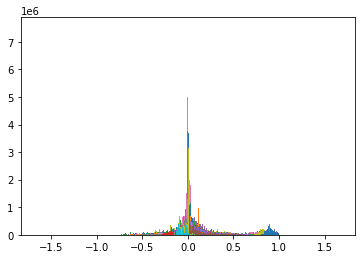

In [ ]:
IR_idt=colour_transfer_IDT(I0,I1,10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


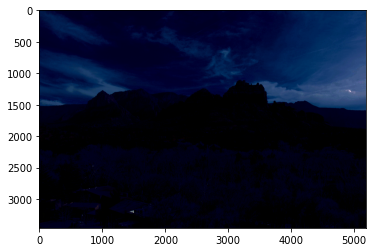

In [ ]:
plt.imshow(IR_idt)

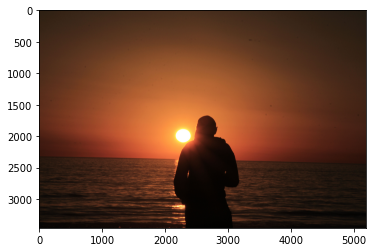

In [ ]:
plt.imshow(I1)

In [ ]:
from skimage import img_as_ubyte
from PIL import Image  
import PIL 
cp2= IR_idt
img2 = img_as_ubyte(cp2/np.max(cp2))
x = Image.fromarray(img2)

In [ ]:
im1 = x.save("result_N_dimensional/result1.jpg") # s2 t5

In [ ]:
im1 = x.save("result_N_dimensional/result1_opp.jpg") # s2 t5

In [ ]:
im1 = x.save("result_N_dimensional/result2.jpg") # s1 t4

In [ ]:
im1 = x.save("result_N_dimensional/result2_opp.jpg") # s1 t4

In [ ]:
im1 = x.save("result_N_dimensional/result5_opp.jpg") # s2 t4

In [ ]:
im1 = x.save("result_N_dimensional/result10_opp.jpg") # s2 t1

In [ ]:
im1 = x.save("result_N_dimensional/result6_opp.jpg") # s6 t5

In [ ]:
im1 = x.save("result_N_dimensional/result8_opp.jpg") # s6 t4

In [ ]:
im1 = x.save("result_N_dimensional/result9_opp.jpg") # s6 t1

In [ ]:
im1 = x.save("result_N_dimensional/result3_opp.jpg") # s3 t2

In [ ]:
im1 = x.save("result_N_dimensional/result12_opp.jpg") # s5 t2

In [ ]:
im1 = x.save("result_N_dimensional/result7_opp.jpg") # s7 t2

In [ ]:
im1 = x.save("result_N_dimensional/result13_opp.jpg") # s7 t7

In [ ]:
im1 = x.save("result_N_dimensional/result14_opp.jpg") # s3 t7

In [ ]:
im1 = x.save("result_N_dimensional/result15_opp.jpg") # s5 t7